# [ContactPose: A Dataset of Grasps with Object Contact and Hand Pose](https://contactpose.cc.gatech.edu)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import cv2
import matplotlib.pyplot as plt

from utilities.dataset import ContactPose
from utilities.misc import draw_hands, draw_object_markers

In [2]:
cp = ContactPose(28, 'use', 'bowl')
print(cp)

Participant 28, intent use, object bowl
558 frames
Cameras present: kinect2_left kinect2_middle kinect2_right
Hands present: left right


In [3]:
# read images
frame_idx = 7
im_filenames = cp.image_filenames('color', frame_idx)
print(im_filenames)
ims = {camera_name: cv2.imread(filename) for camera_name,filename in im_filenames.items()}

{'kinect2_left': 'data/contactpose_data/full28_use/bowl/images_full/kinect2_left/color/frame007.png', 'kinect2_middle': 'data/contactpose_data/full28_use/bowl/images_full/kinect2_middle/color/frame007.png', 'kinect2_right': 'data/contactpose_data/full28_use/bowl/images_full/kinect2_right/color/frame007.png'}


<IPython.core.display.Javascript object>


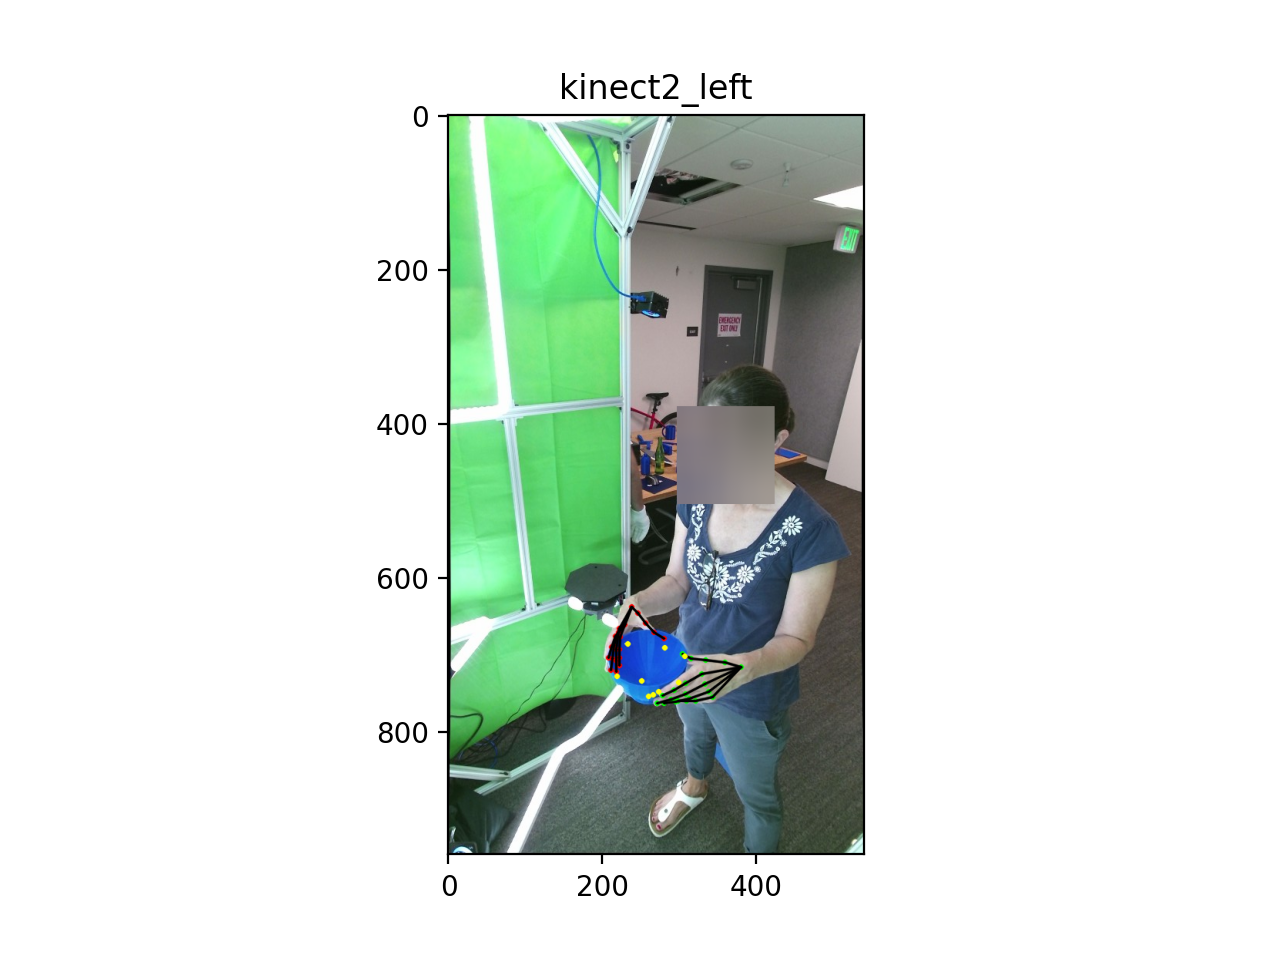

<IPython.core.display.Javascript object>


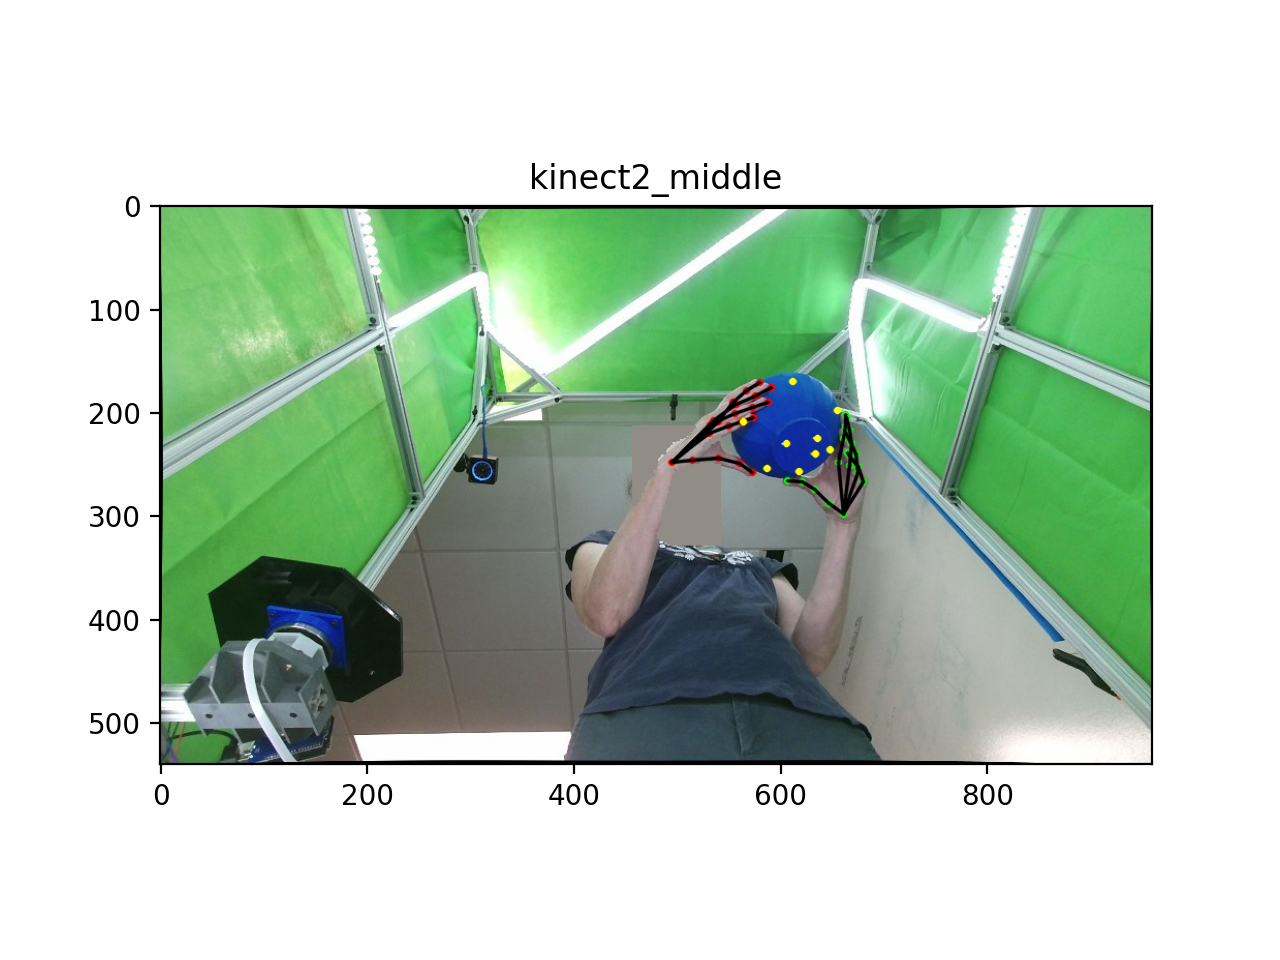

<IPython.core.display.Javascript object>


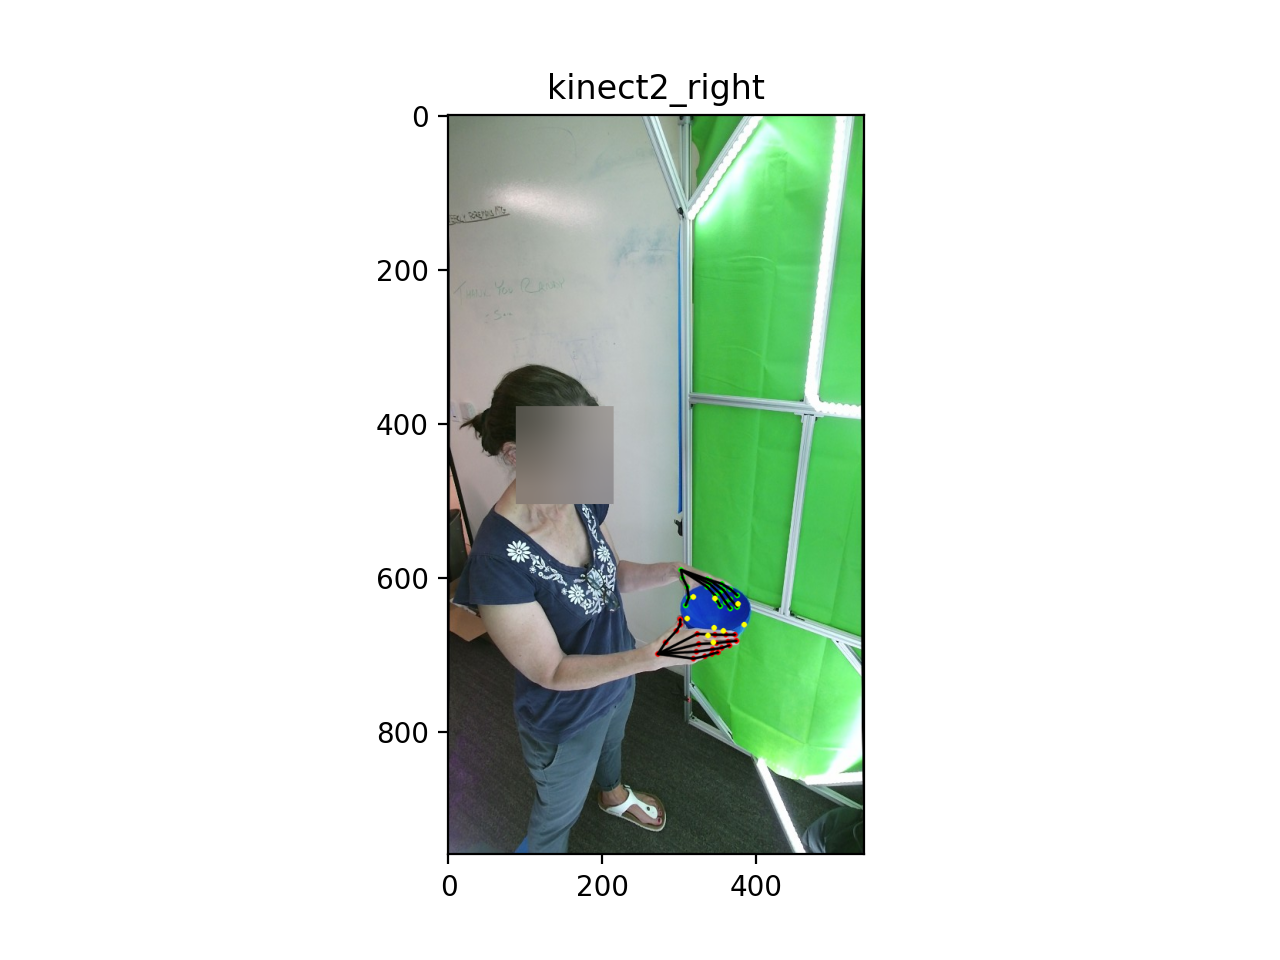

In [4]:
for camera_name, im in ims.items():
    # get projected hand joints and object markers
    joints = cp.projected_hand_joints(camera_name, frame_idx)
    markers = cp.projected_object_markers(camera_name, frame_idx)
    
    # draw on image
    im = draw_hands(im, joints)
    im = draw_object_markers(im, markers)
    
    # show
    plt.figure()
    plt.title(camera_name)
    plt.imshow(im[:, :, ::-1])  # BGR -> RGB
plt.show()

The `ContactPose` class also provides access to other grasp information:

In [5]:
# contact map filename
cp.contactmap_filename

'data/contactpose_data/full28_use/bowl/bowl.ply'

In [6]:
# annotation (camera pose, intrinsics, hand pose, object poses) JSON
cp.annotation_filename

'data/contactpose_data/full28_use/bowl/annotations.json'

In [7]:
# 3D hand joints (21 per hand) w.r.t. object
cp.hand_joints()

(array([[-0.09103539, -0.1429454 ,  0.06081487],
        [-0.06784853, -0.123522  ,  0.06232945],
        [-0.04323405, -0.09704102,  0.06084233],
        [-0.02030137, -0.08091315,  0.05395088],
        [ 0.00142398, -0.07617097,  0.04994612],
        [-0.07720061, -0.06287964,  0.07254209],
        [-0.08047606, -0.02590339,  0.07182242],
        [-0.07756052, -0.00407024,  0.06540209],
        [-0.07193688,  0.01522766,  0.05934276],
        [-0.08914707, -0.06151341,  0.05957198],
        [-0.08330508, -0.02474036,  0.051073  ],
        [-0.07256268, -0.00119515,  0.04217282],
        [-0.06309627,  0.02009729,  0.03568053],
        [-0.09507959, -0.06697339,  0.04570889],
        [-0.08349108, -0.03348737,  0.03723868],
        [-0.07082185, -0.01274151,  0.02959193],
        [-0.05981062,  0.00386143,  0.02519355],
        [-0.09746635, -0.07430466,  0.03132193],
        [-0.08424728, -0.04730602,  0.02512937],
        [-0.073341  , -0.03467355,  0.02120002],
        [-0.06353759

In [8]:
# camera intrinsics
for camera_name in cp.valid_cameras:
    print(camera_name)
    print(cp.K(camera_name))

kinect2_left
[[   0.         -521.31364024  264.49587679]
 [ 520.61316972    0.          477.19634221]
 [   0.            0.            1.        ]]
kinect2_middle
[[-527.13175215    0.          468.63777208]
 [   0.         -527.67039201  267.38972617]
 [   0.            0.            1.        ]]
kinect2_right
[[   0.          533.90600017  270.14347071]
 [-533.85587261    0.          486.5939602 ]
 [   0.            0.            1.        ]]


In [9]:
# object pose w.r.t. camera
for camera_name in cp.valid_cameras:
    print(camera_name)
    print(cp.object_pose(camera_name, frame_idx))

kinect2_left
[[-2.71359029e-01  1.55128768e-01 -9.49894385e-01  3.97591722e-01]
 [ 4.98501005e-01  8.66888719e-01 -8.35219021e-04  5.03252349e-03]
 [ 8.23323160e-01 -4.73749949e-01 -3.12569928e-01  7.68790495e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
kinect2_middle
[[ 0.99691813  0.03368243  0.07085005 -0.20304911]
 [-0.06238947  0.88791841  0.45575043  0.04632313]
 [-0.04755828 -0.45876617  0.88728339  0.68383976]
 [ 0.          0.          0.          1.        ]]
kinect2_right
[[-0.41041973 -0.18327112  0.89329018 -0.31929689]
 [-0.5487652   0.83200096 -0.0814319   0.13472569]
 [-0.72829417 -0.52362782 -0.44204242  0.91070686]
 [ 0.          0.          0.          1.        ]]


In [10]:
# MANO parameters - pose PCA components 'pose', shape PCA components 'betas', root transform 'hTm'
cp.mano_params

[{'pose': [-0.08642531858185405,
   0.0388672023178926,
   0.037140553775492816,
   0.30248833847258366,
   -1.2190418271323928,
   0.19381732319562953,
   0.08671134276780672,
   0.14738602216246607,
   -0.39434455470463836,
   0.9695789926281716,
   -0.13741673731932968,
   2.890556783333026,
   0.7311120031583888,
   -2.4891000565580077,
   -1.756470781449286,
   3.2014824123480183,
   3.546323123020029,
   -2.7127196814263654],
  'betas': [0.004959322272535842,
   0.0010441738624362424,
   -0.0029713668040915694,
   -0.0005063915841147337,
   -0.0005836481972764429,
   0.0008301602115725175,
   -0.0002560932038054986,
   0.0004916948467024717,
   -0.00010063553073775828,
   -0.0002931933592622586],
  'hTm': array([[ 0.05926333, -0.81459427,  0.5769957 , -0.08123753],
         [ 0.99316661, -0.01009995, -0.11626728, -0.04901997],
         [ 0.10053829,  0.57994324,  0.80842927,  0.05650253],
         [ 0.        ,  0.        ,  0.        ,  1.        ]])},
 {'pose': [0.0054325974891

In [11]:
# MANO meshes - vertices, face indices, and 21 joints
for hand_name, mesh in zip(('Left', 'Right'), cp.mano_meshes()):
    if mesh is None:
        continue
    print('### Hand {:s}'.format(hand_name))
    print('vertices: ', mesh['vertices'].shape)
    print('face indices: ', mesh['faces'].shape)
    print('joints: ', mesh['joints'].shape)

### Hand Left
vertices:  (778, 3)
face indices:  (1538, 3)
joints:  (21, 3)
### Hand Right
vertices:  (778, 3)
face indices:  (1538, 3)
joints:  (21, 3)
